# Heart Disease UCI Prediction & Analysis 
## Using Logistic Regression
## Code by Hardik :)
Dataset by Heart Disease UCI
## Dataset Column Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
* ca
number of major vessels (0-3) colored by flourosopy
* thal

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target
1 or 0

#### Dataset source: 
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Context:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

# Table of contents
1. [Imports & reading dataset ](#1)
2. [Data Description](#2)
3. [Data Analysis](#3)
4. [Data Visualization](#4)
5. [Data Pre-processing](#5)
6. [Logistic Regression](#6)
7. [Conclusion](#7)

## Information

Chest Pain Type:
* Asymptomatic means neither causing nor exhibiting symptoms of disease.
* Atypical chest pain is characterized as chest pain that does NOT have all three typical characteristics of chest pain. These typical indicators include: 1) chest pain or discomfort in the center of the chest behind the breastbone, 2) getting worse with exercise or stress, and 3) getting better with rest or medication called nitroglycerin.
* Typical angina (TA) is characterized as underneath the chest pain caused by physical or emotional stress and alleviated by relaxation or nitroglycerin. Especially in the environment of a non-blocking coronary artery disease ( CAD), women and elderly patients have atypical symptoms both during rest and stress.
* Non-cardiac chest pain is the term used to describe chest pain that is not caused by heart disease or a heart attack. In most people, non-cardiac chest pain is related to problems with the esophagus, such as gastroesophageal reflux disease. Other causes include muscle or bone problems, lung or disease, stomach problems , stress, anxiety , and depression.

In [776]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Imports & reading dataset <a name="1"></a>

In [777]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [778]:
df = pd.read_csv('/content/drive/My Drive/dataset/heart.csv')

In [779]:
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [780]:
df.tail()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[5 rows x 14 columns]

# 2.Data Description<a name="2"></a>

### * Describe

There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data mentioned below. So we are going to follow the second description.

1 - description

```
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
•	age: The person's age in years
•	sex: The person's sex (1 = male, 0 = female)
•	cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•	trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•	chol: The person's cholesterol measurement in mg/dl
•	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•	restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•	thalach: The person's maximum heart rate achieved
•	exang: Exercise induced angina (1 = yes; 0 = no)
•	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•	ca: The number of major vessels (0-3)
•	thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•	target: Heart disease (0 = no, 1 = yes)
```





2 - description

```
Hi everyone, I chose this dataset for a final project on a multivariate statistics course I'm taking, and for the last couple of days I've been struggling to get the appropriate description of the features.
For some unknown reason, the dataset for download on Kaggle is VERY different from the one you can download at https://archive.ics.uci.edu/ml/datasets/heart+Disease
And what's worse: the description here on Kaggle is the same as the one in the Cleveland page, that means every interpretation you make based on the Kaggle dataset is WRONG.
So here it goes, the CORRECT description of the kaggle dataset.

cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina

restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

thal
Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.

target (maybe THE most important feature): 0 = disease, 1 = no disease

A few more things to consider:
data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

I'll copy a sentence so you get more insight about the "thal" column (thal is for Thalium, a radioactive tracer injected during a stress test):
--Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect." --

You can check all of this by comparing the Kaggle and the UCI datasets. Feel free to ask/correct/comment/say hi.

To open a .data file, change the extension to a .txt and then open it with excel or similars.

You're welcome!
```

In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [782]:
df.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

### * Null

In [783]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

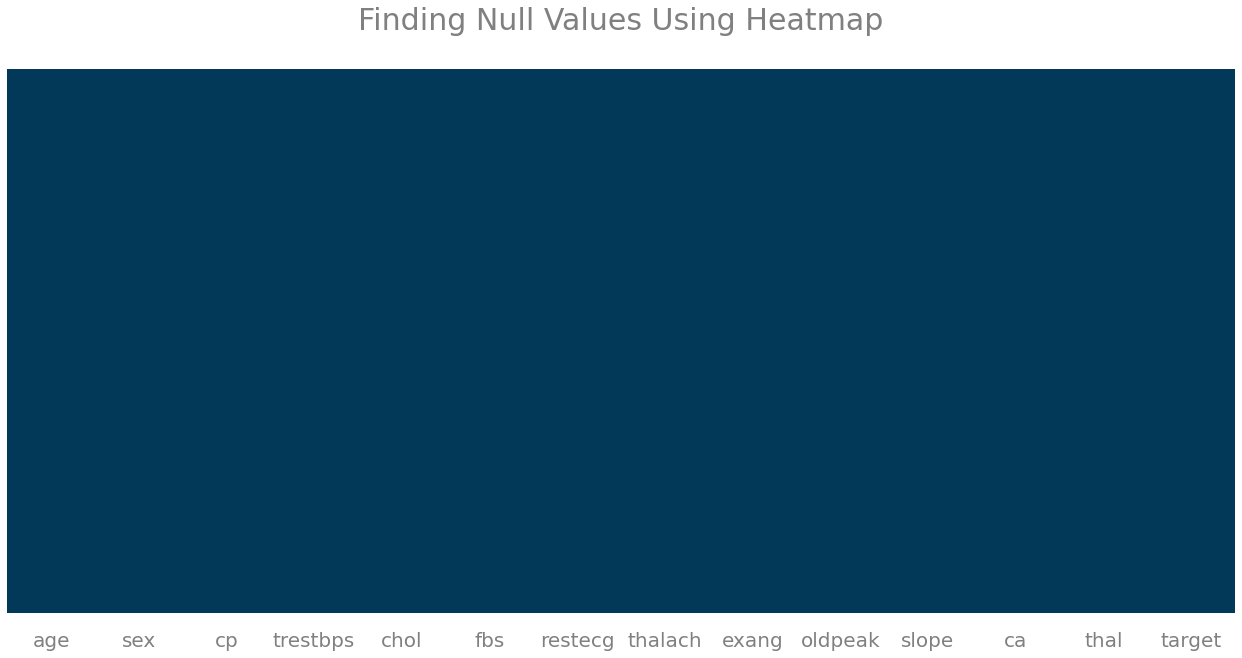

In [784]:
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

No Null values

### * pandas-profiling

In [785]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
pp.ProfileReport(df)

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=ea207f6b4eb5d45f181745be9674cfda725e3d28444df9455f0a8a2deafebcd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-35lvp3bq/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


# 3.Data Analysis<a name="3"></a>

## * Feature Selection

### 1.Univariate Selection
* Statistical tests can be used to select those features that have the strongest relationship with the output variable.
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [786]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### 2.Feature Importance
* You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
* Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.07014848 0.05509764 0.11651191 0.05809559 0.0599577  0.02098501
 0.03742983 0.08870336 0.10333566 0.08737972 0.06623083 0.12641433
 0.10970995]


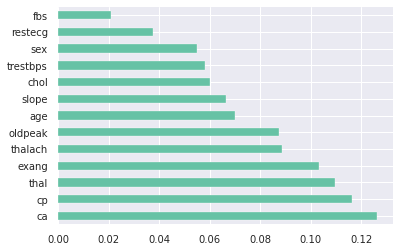

In [787]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
* Correlation states how the features are related to each other or the target variable.
* Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
* Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

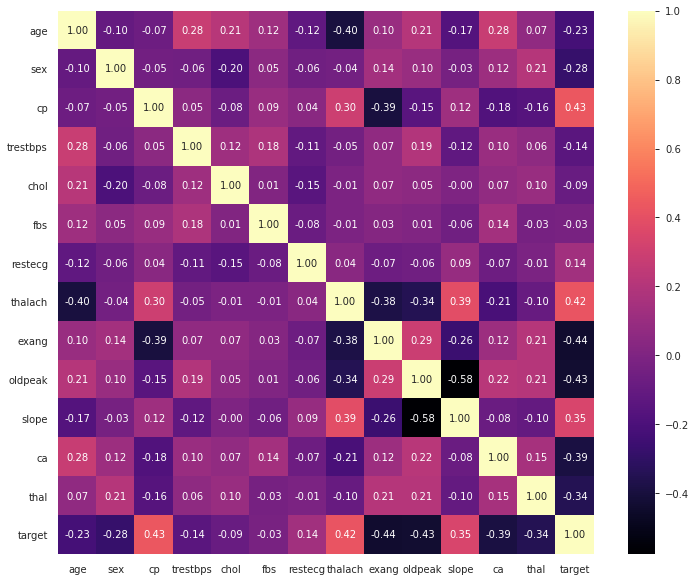

In [788]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [789]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


# 4.Data Visualizaiton<a name="4"></a>

### * Seaborn

In [790]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

#### 1.Countplot

In [791]:
df2 = df.copy()

In [792]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [793]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

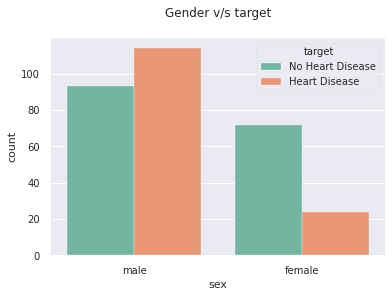

In [794]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

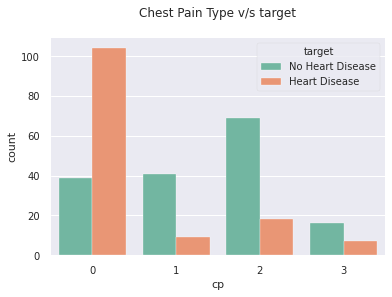

In [795]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


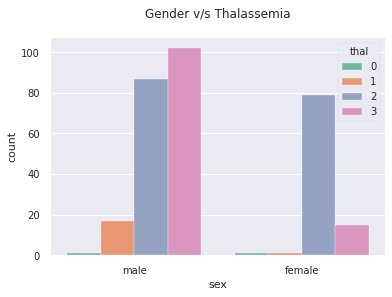

In [796]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

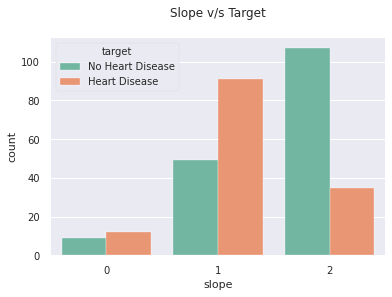

In [797]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

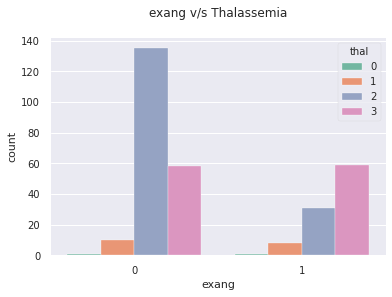

In [798]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

#### 2.Distplot

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

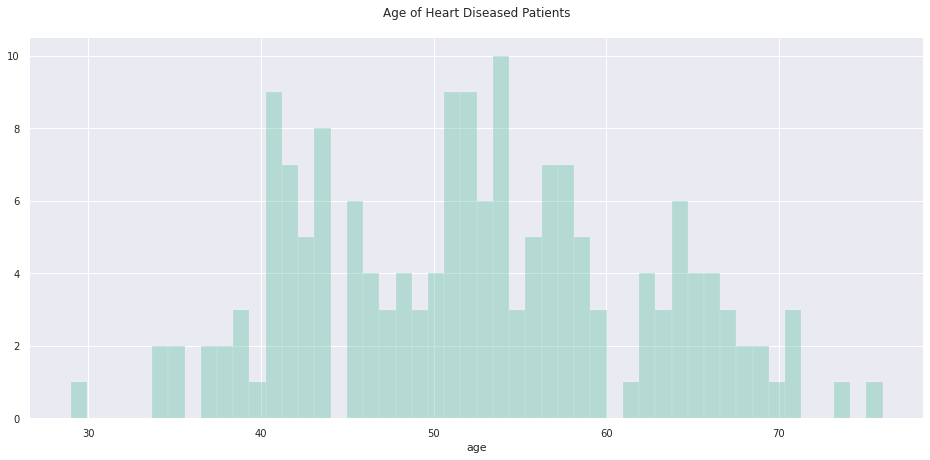

In [799]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

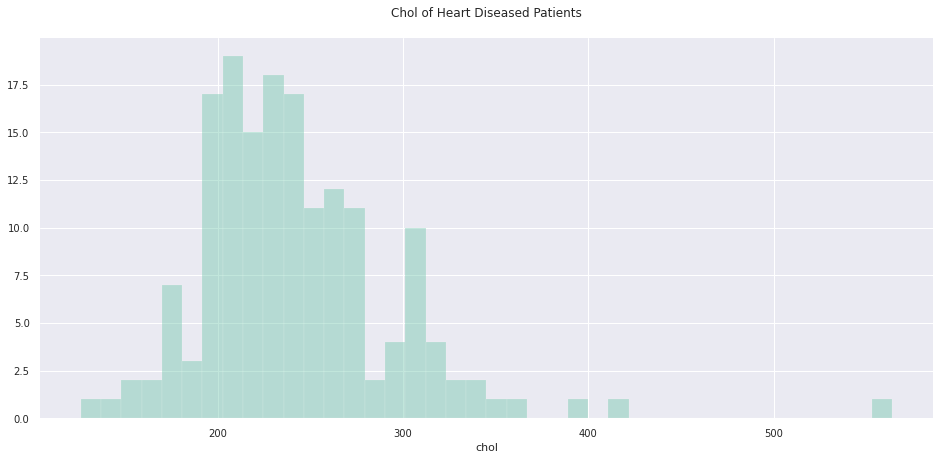

In [800]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

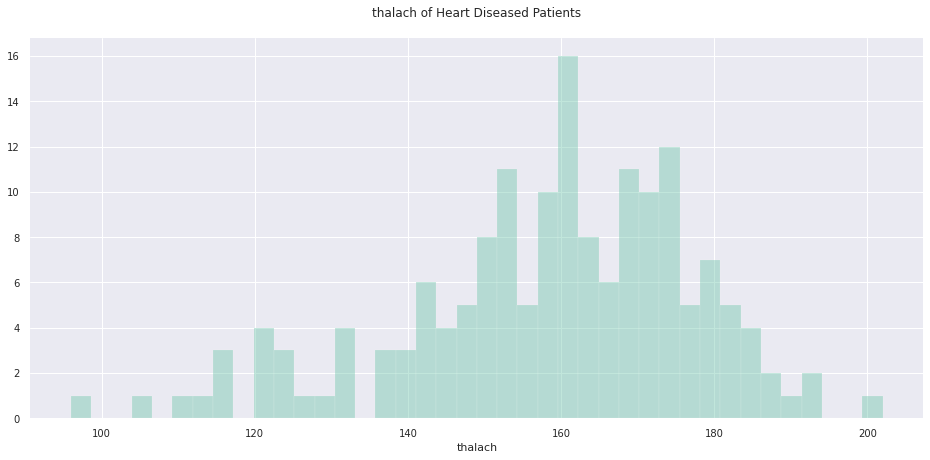

In [801]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

#### 3.Jointplot

In [802]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


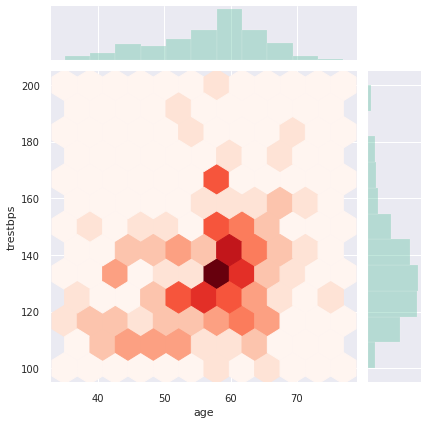

In [803]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )


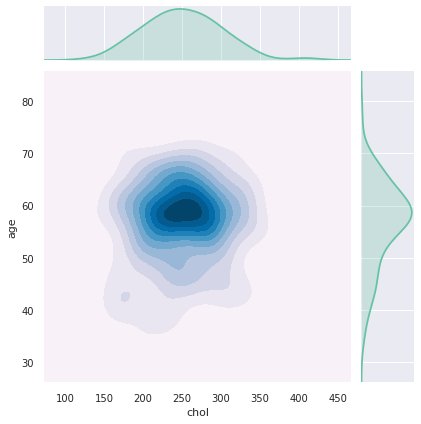

In [804]:


sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


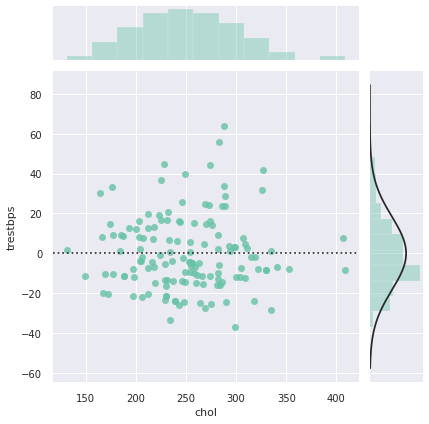

In [805]:

sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )


####  4.Boxplot / violinplot

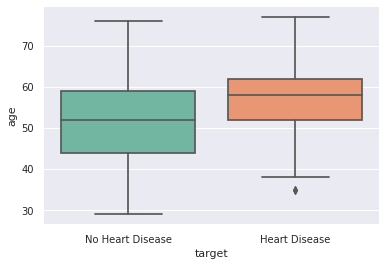

In [806]:
sns.boxplot(data=df2,x='target',y='age')

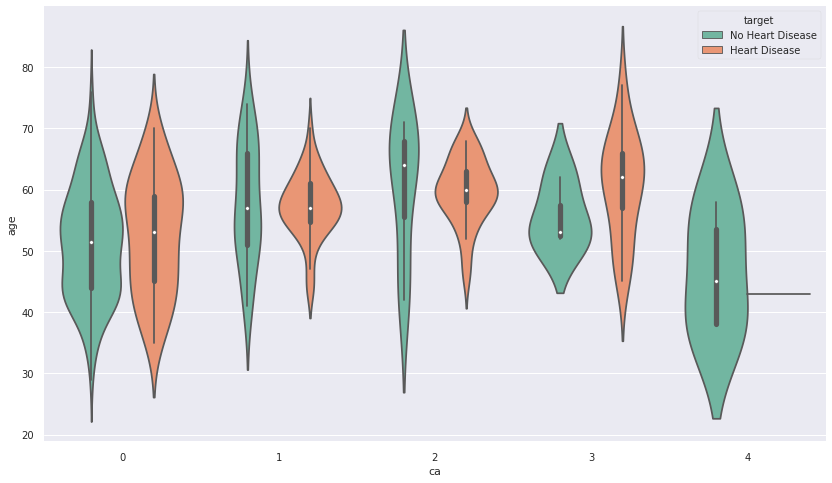

In [807]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

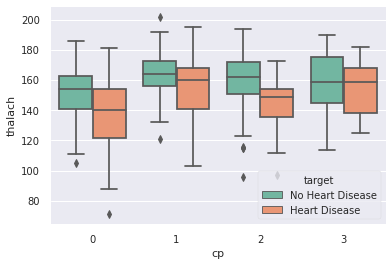

In [808]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

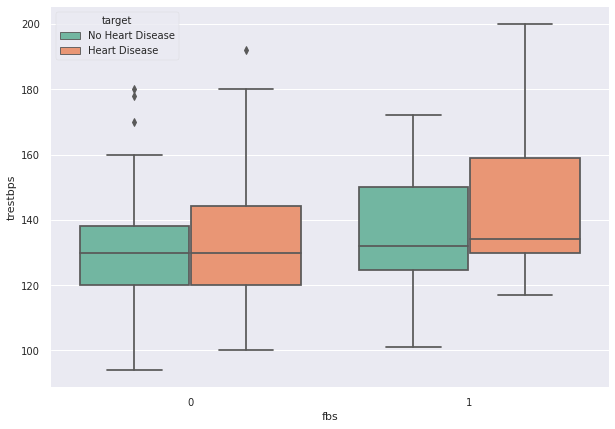

In [809]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

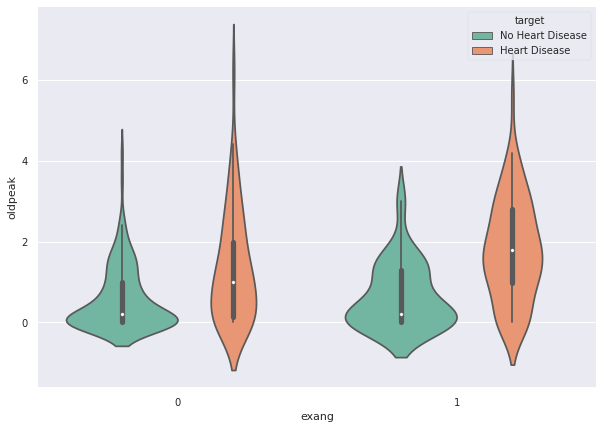

In [810]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

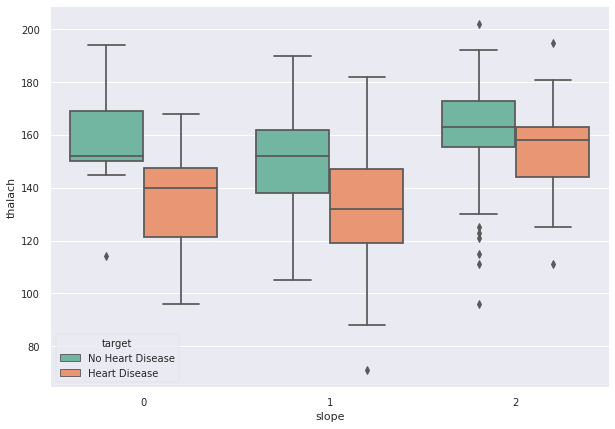

In [811]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

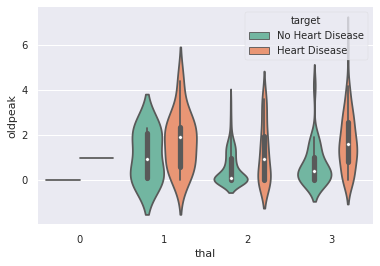

In [812]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

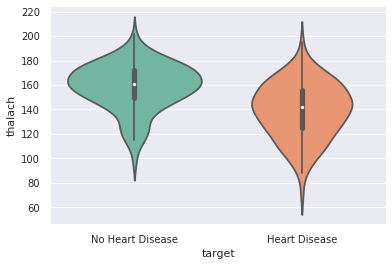

In [813]:
sns.violinplot(data=df2,x='target',y='thalach')

####5.Cluster Map

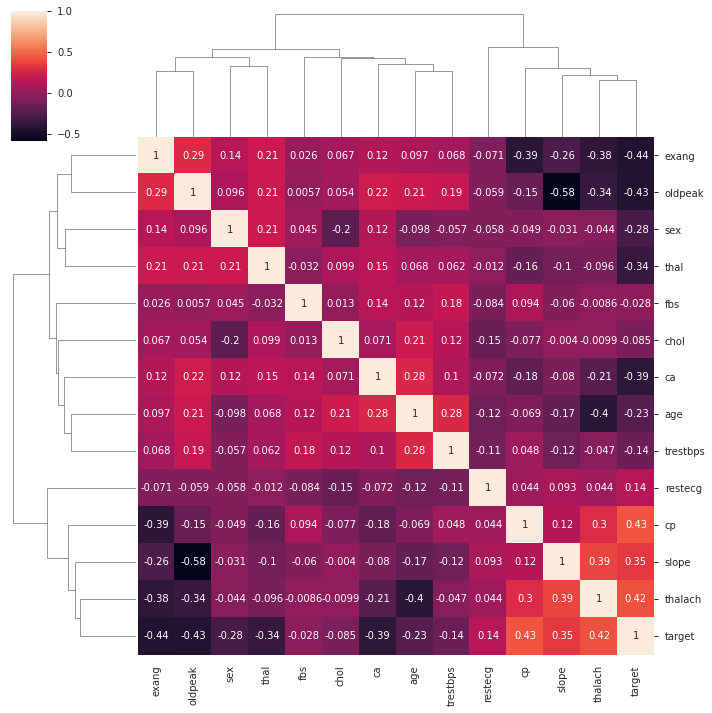

In [814]:
sns.clustermap(df.corr(),annot=True)

####5.Pairplot

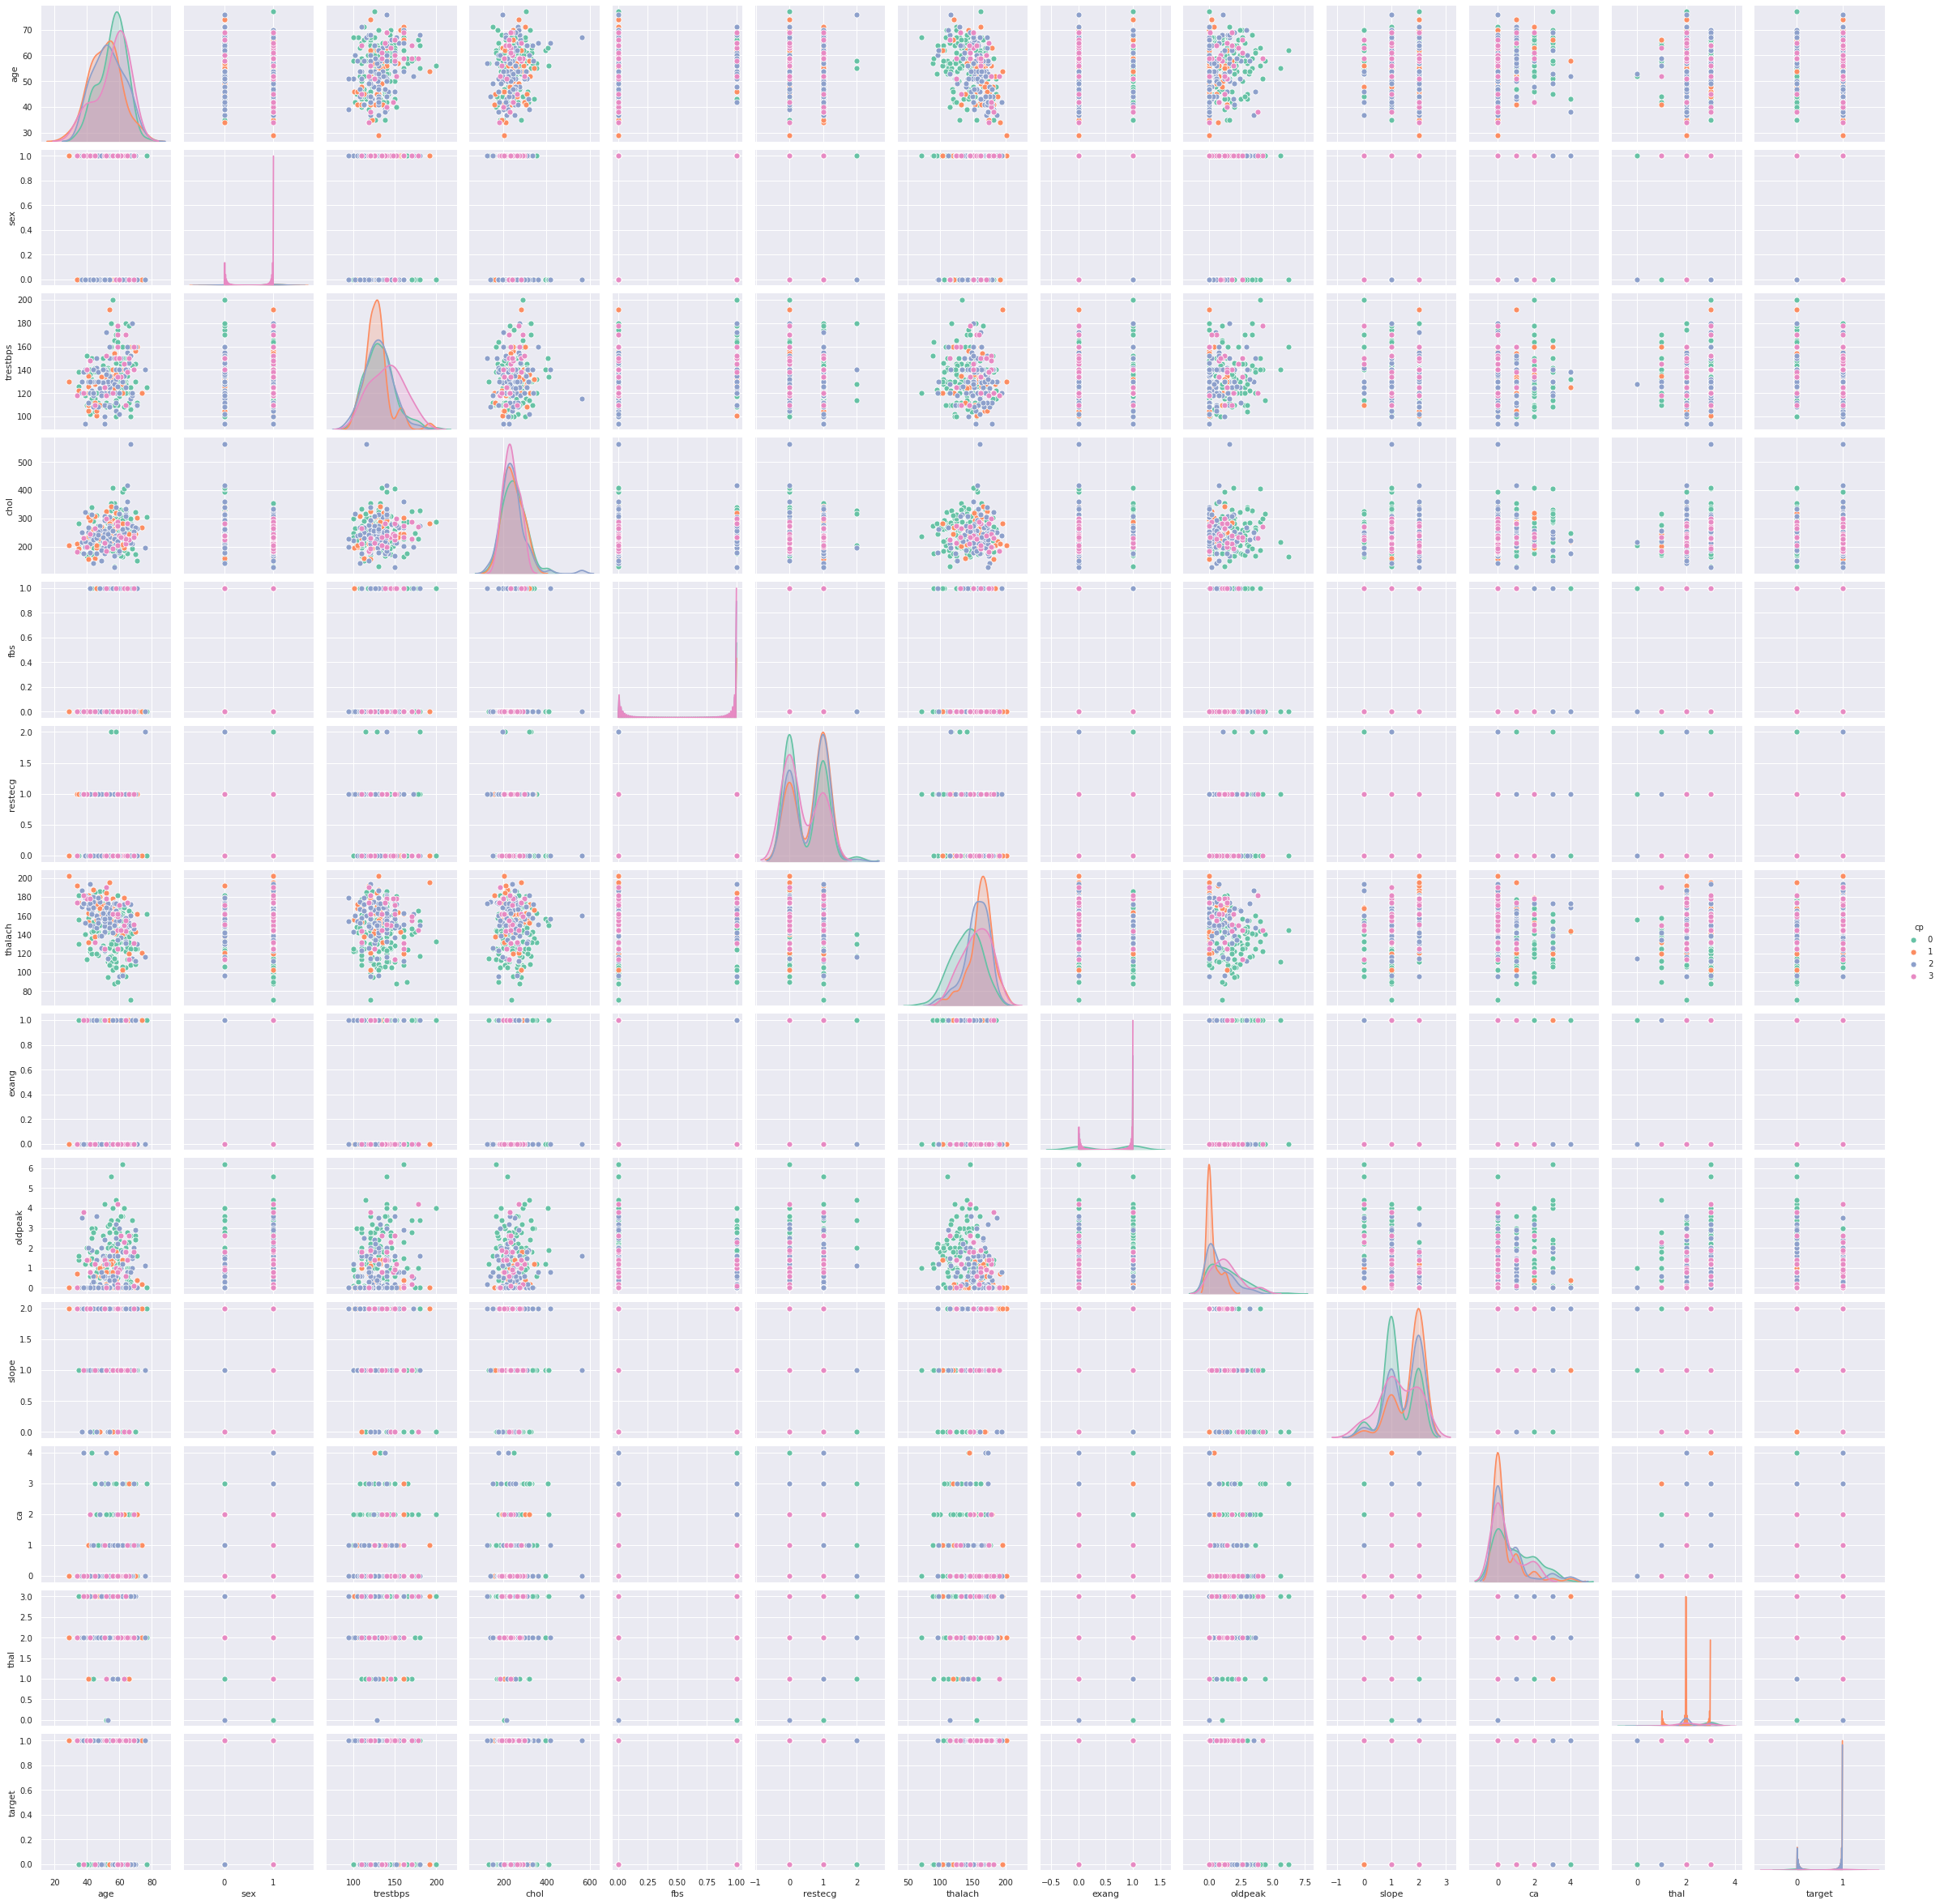

In [815]:
sns.pairplot(df,hue='cp')

## * Classification Tree

In [816]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [817]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [818]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [819]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

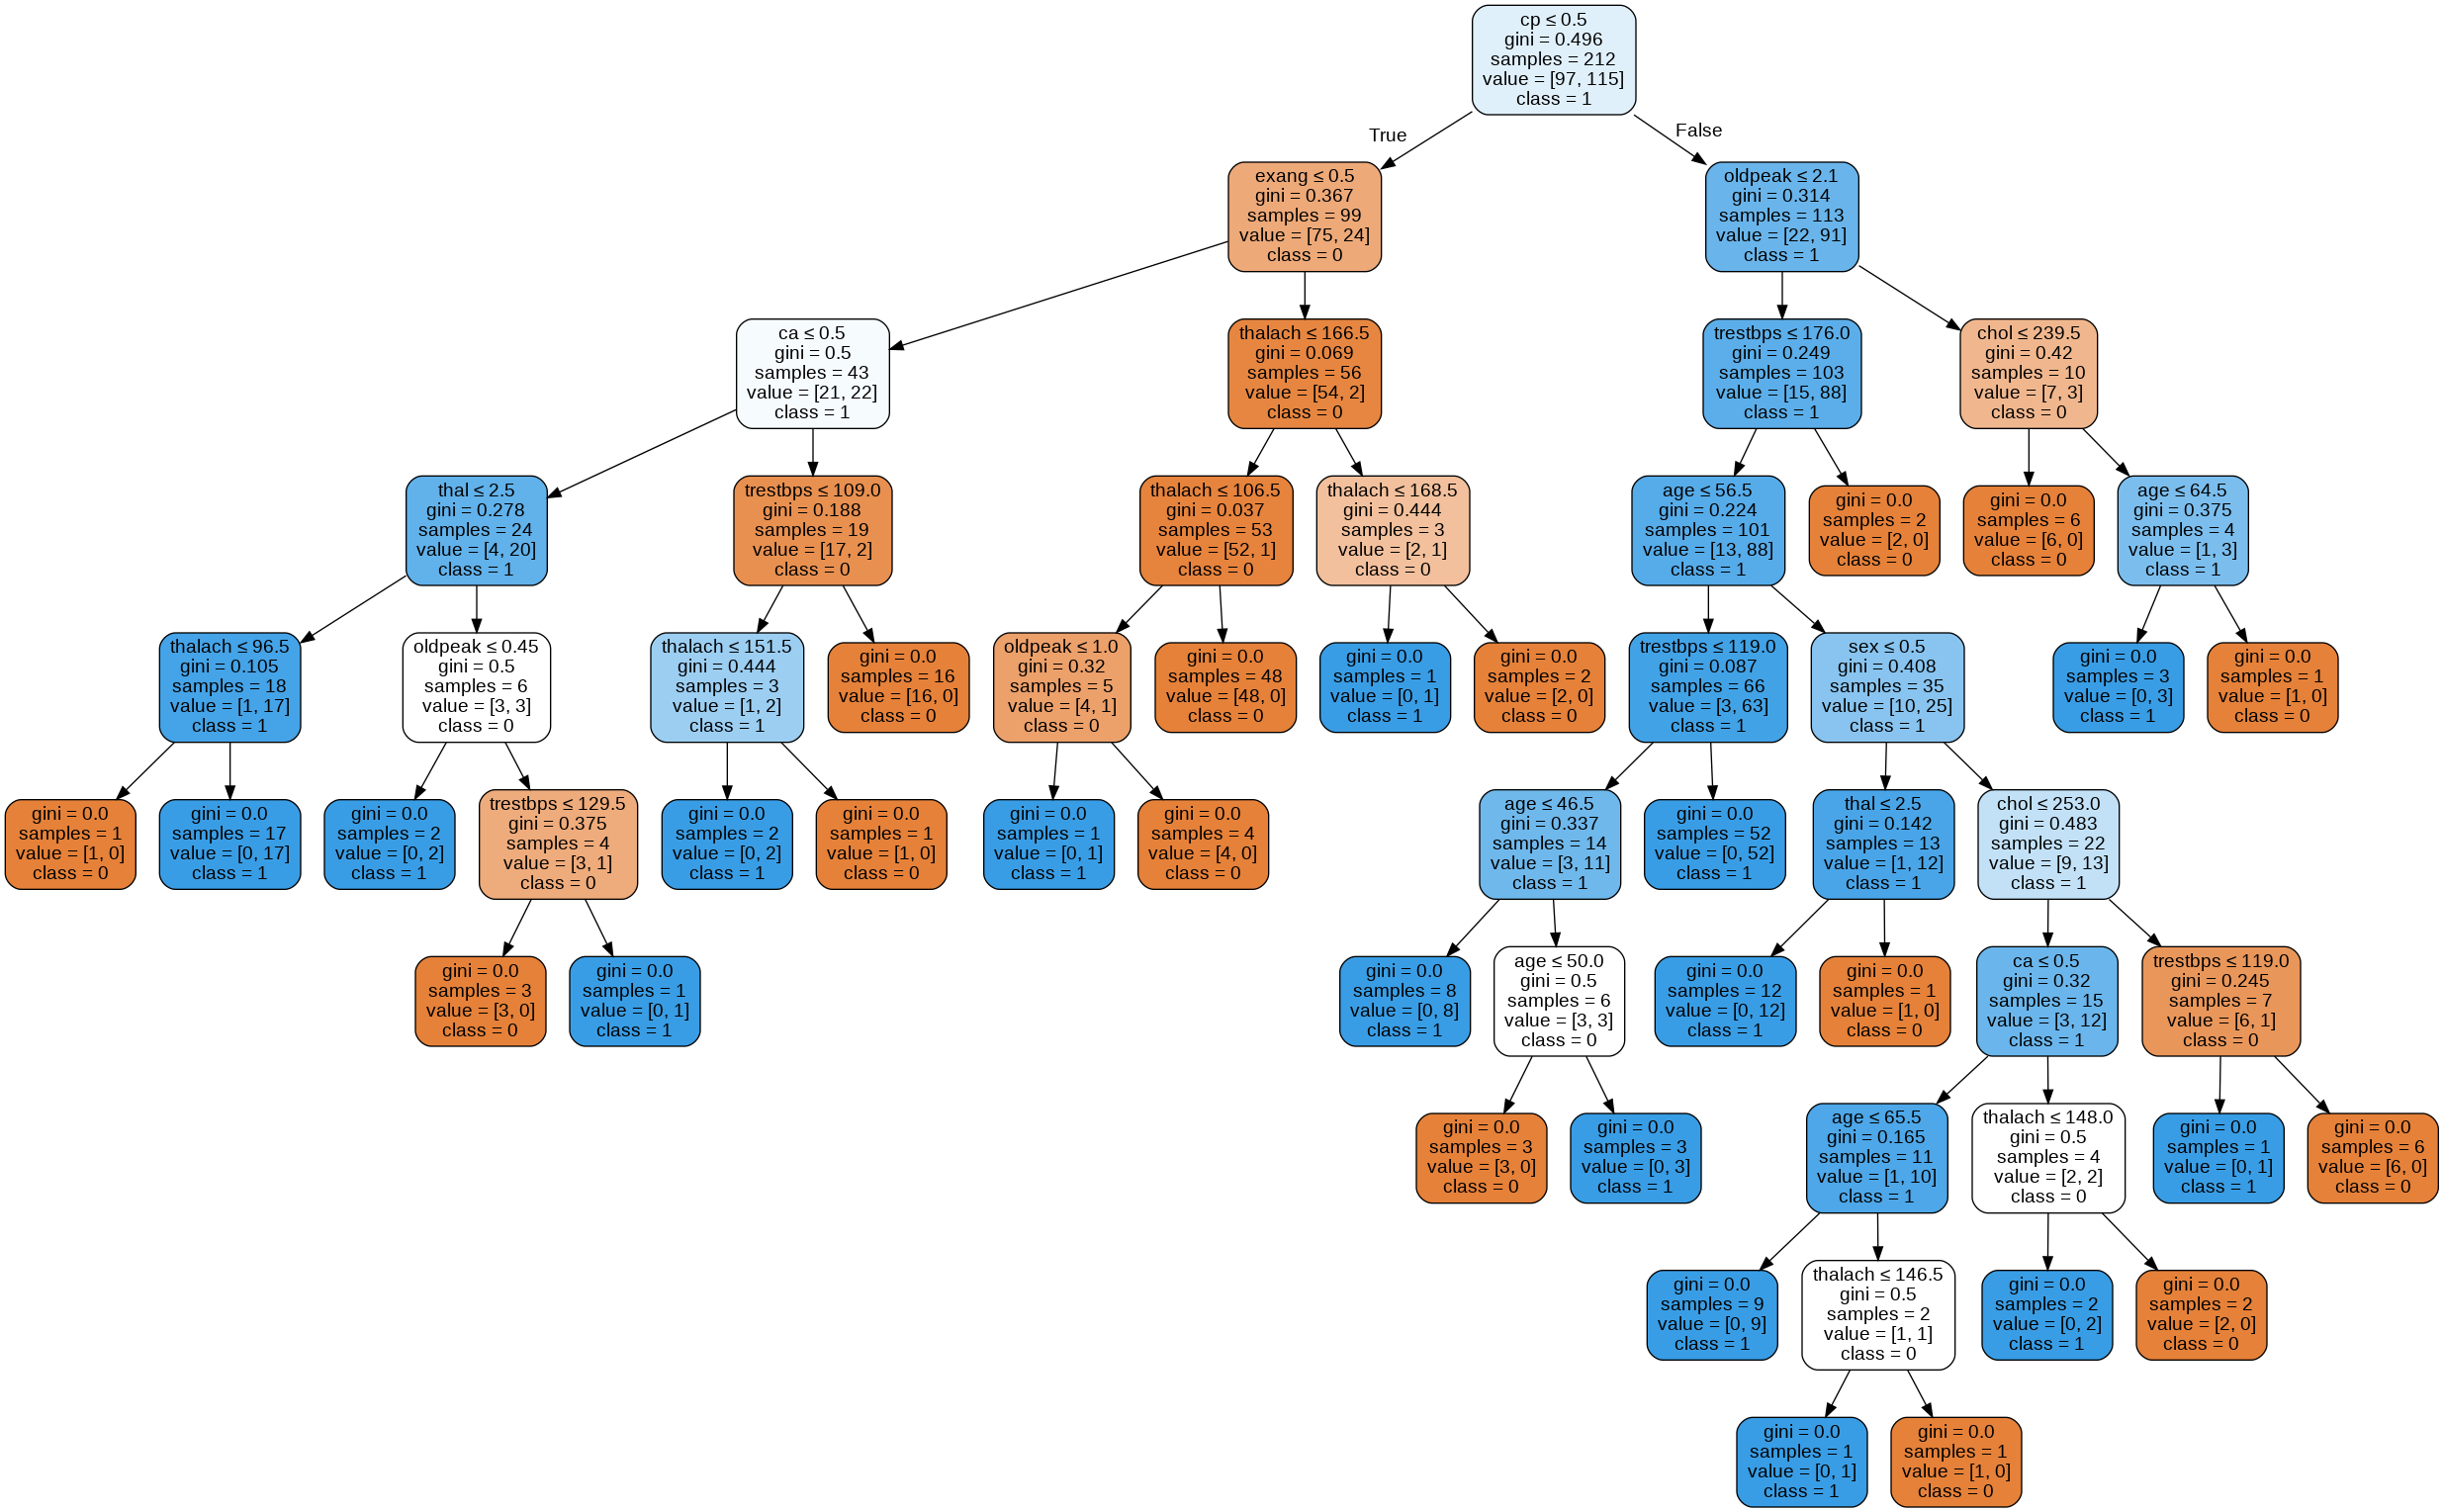

In [820]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [821]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


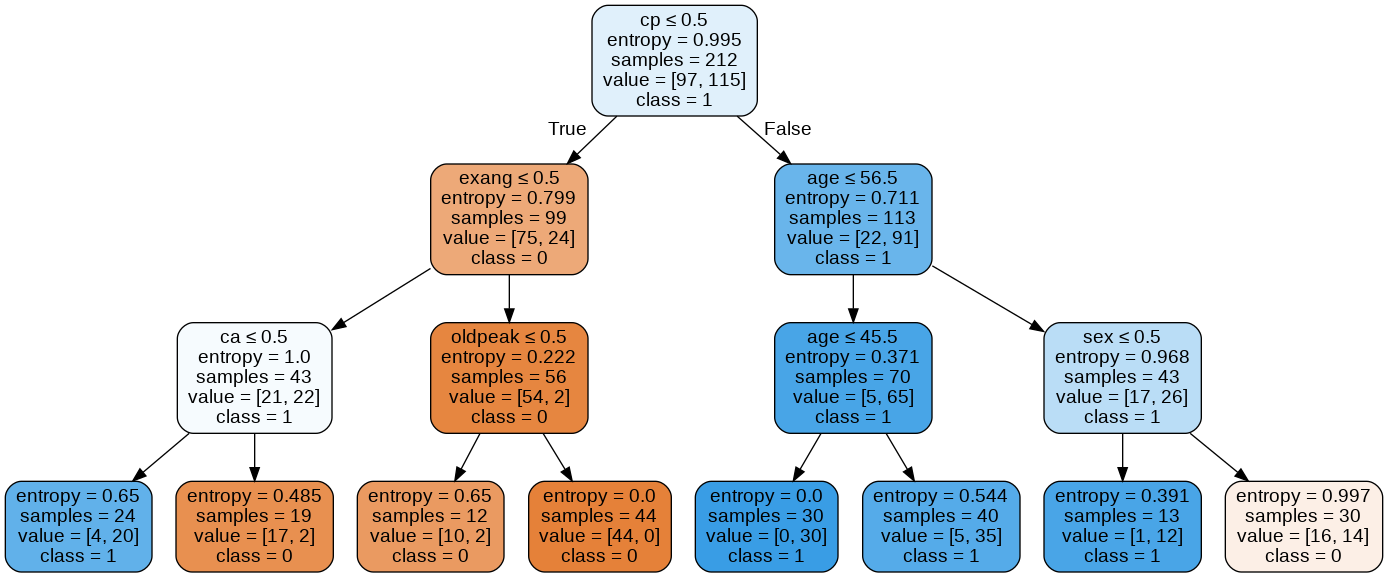

In [822]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# 5.Data Pre-processing<a name="5"></a>

### * Pre-processing

Change Name of the column

In [823]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

We have 4 Categorical columns as seen in Data Description using pandas profiling:

cp - chest_pain_type

restecg - rest_ecg_type

slope - st_slope_type

thal - thalassemia_type

Generating categorical columns values

In [824]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [825]:
df.head()

age  sex   chest_pain_type  ...  num_major_vessels  thalassemia_type  target
0   63    1    typical angina  ...                  0      fixed defect       1
1   37    1  non-anginal pain  ...                  0            normal       1
2   41    0   atypical angina  ...                  0            normal       1
3   56    1   atypical angina  ...                  0            normal       1
4   57    0      asymptomatic  ...                  0            normal       1

[5 rows x 14 columns]

### * One Hot Encoding

In [826]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [827]:
df_temp = data['thalassemia_type_fixed defect']

In [828]:
data = pd.get_dummies(df, drop_first=True)

In [829]:
data.head()

age  sex  ...  thalassemia_type_nothing  thalassemia_type_reversable defect
0   63    1  ...                         0                                   0
1   37    1  ...                         0                                   0
2   41    0  ...                         0                                   0
3   56    1  ...                         0                                   0
4   57    0  ...                         0                                   0

[5 rows x 20 columns]

Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [830]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  ...  thalassemia_type_reversable defect  thalassemia_type_fixed defect
0   63    1  ...                                   0                              1
1   37    1  ...                                   0                              0
2   41    0  ...                                   0                              0
3   56    1  ...                                   0                              0
4   57    0  ...                                   0                              0

[5 rows x 21 columns]

In [831]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

# 6.Logistic Regression<a name="6"></a>

##### 1.Gather columns

In [832]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [833]:
X = result.drop('target', axis = 1)
          

In [834]:
y = result['target']

##### 2.Splitting Data

In [835]:
from sklearn.model_selection import train_test_split

In [836]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### 3.Normalization

In [837]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

#####4.Fitting into Model

In [838]:
from sklearn.linear_model import LogisticRegression

In [839]:
logre = LogisticRegression()

In [840]:
logre.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####5.Prediction

In [841]:
y_pred = logre.predict(X_test)

In [842]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [843]:
result  = pd.DataFrame(dic)

In [844]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

###6.Model Evaluation

In [845]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [846]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



[[24  3]
 [ 5 29]]


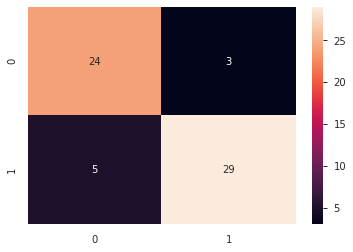

In [847]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

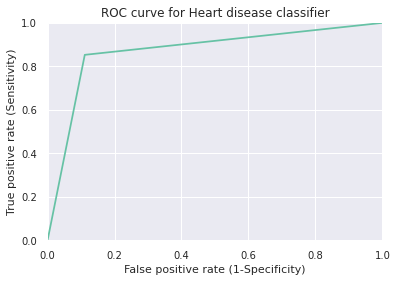

In [848]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [849]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8709150326797386

#7.Conclusion<a name="7"></a>

###1.Coefficients

In [850]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.96772424]


Coeffecient
chest_pain_type_non-anginal pain               1.281633
chest_pain_type_typical angina                 1.036787
max_heart_rate_achieved                        1.028382
thalassemia_type_normal                        0.754872
chest_pain_type_atypical angina                0.732086
rest_ecg_type_normal                           0.338507
st_slope_type_upsloping                        0.212089
rest_ecg_type_left ventricular hypertrophy     0.066738
thalassemia_type_fixed defect                  0.009411
fasting_blood_sugar                           -0.135551
age                                           -0.415560
cholesterol                                   -0.457060
st_slope_type_flat                            -0.466004
resting_blood_pressure                        -0.537316
thalassemia_type_reversable defect            -0.612915
exercise_induced_angina                       -0.786479
sex                                           -1.124012
st_depression                                 -1.146936
num_major_vessels                             -2.272170

<Figure size 720x864 with 0 Axes>

In [851]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [852]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] #target 0 - people with heart disease

##2.Analysis

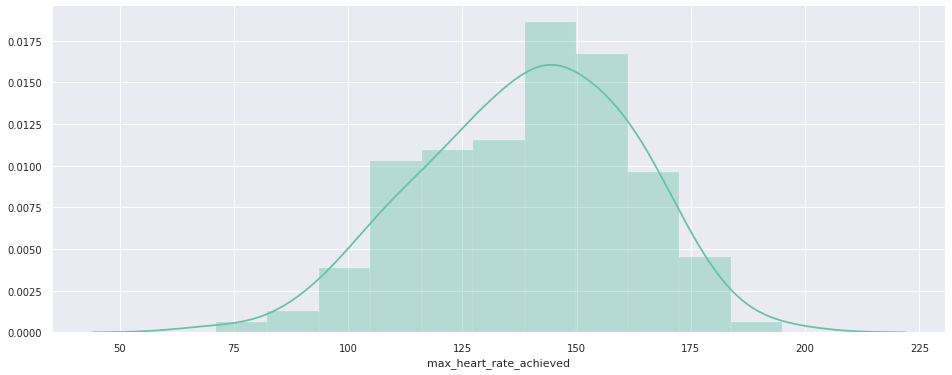

In [853]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

Heart Diseased Patients visualization

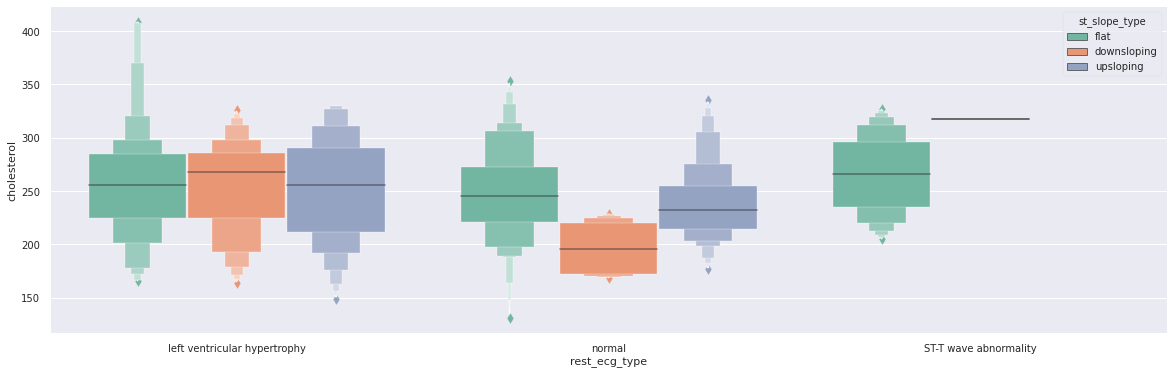

In [854]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='rest_ecg_type',y='cholesterol',hue='st_slope_type')

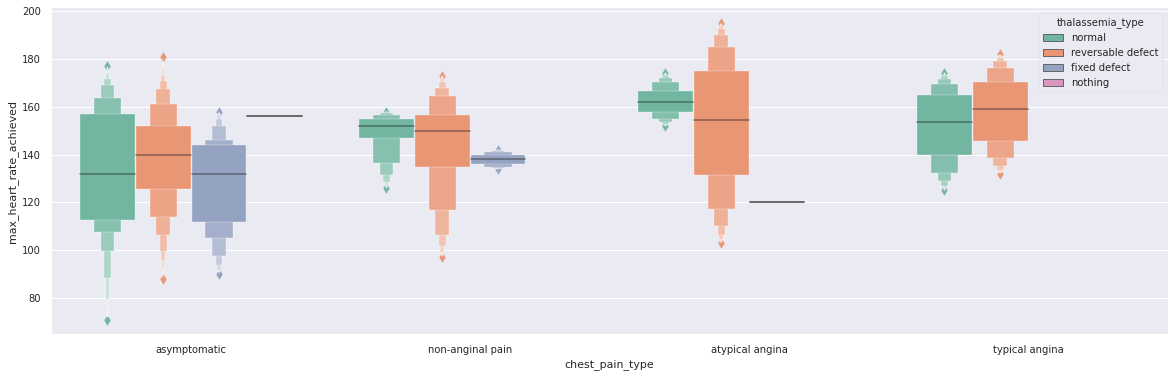

In [855]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type')

Shap

Shap Values

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


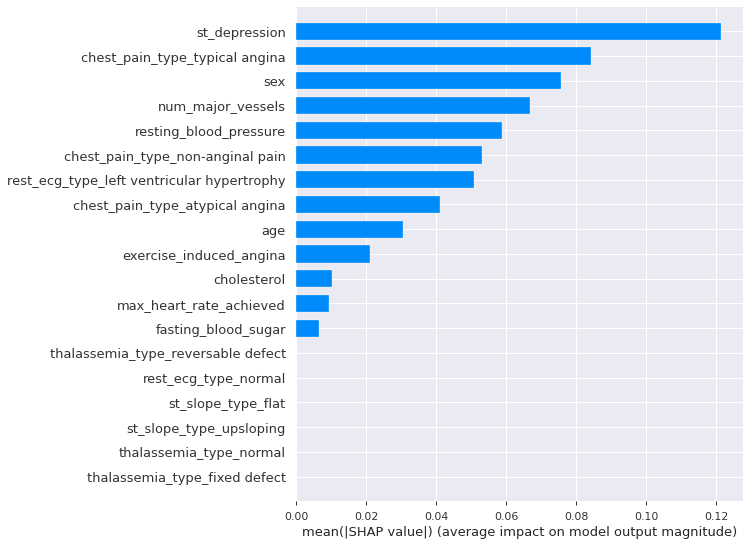

In [856]:
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

Shap value for Model Explaination 

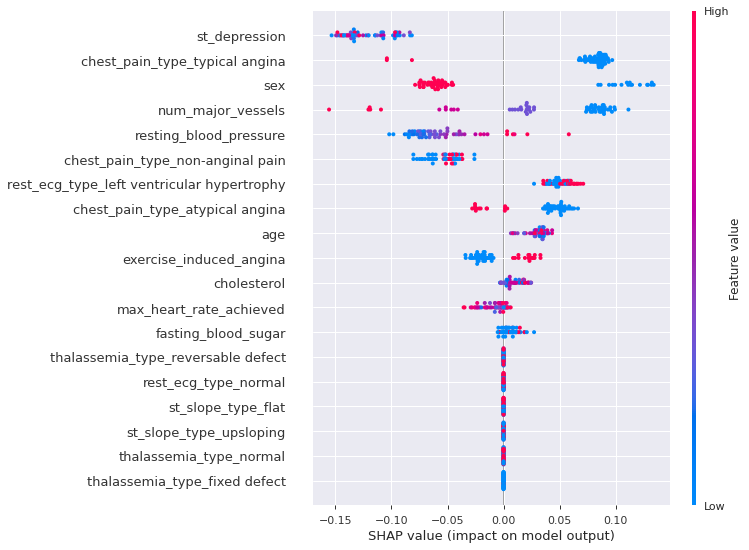

In [857]:
shap.summary_plot(shap_values[1], X_test)

In [858]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

Reports for two Patients

In [859]:
patients = X_test.iloc[3,:].astype(float)
patients_target = y_test.iloc[3:4]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  0


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [860]:
patients = X_test.iloc[33,:].astype(float)
patients_target = y_test.iloc[33:34]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  1


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [861]:
 y_test.iloc[10:11]

111    1
Name: target, dtype: int64

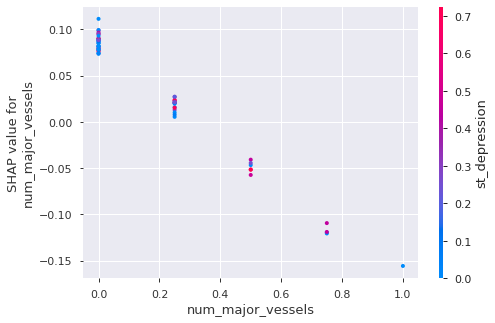

In [862]:
# dependence plot

shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index = "st_depression")

In [863]:
shap_values = explainer.shap_values(X_train.iloc[:50],check_additivity=False)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

##3.Conclusion


*  The Area under the ROC curve is 87.09% which is somewhat satisfactory.
*  The model predicted with 86.88% accuracy. The model is more specific than sensitive.
*  According to this model the major features contributing in precision of predciting model are shown in the heatmap in order.






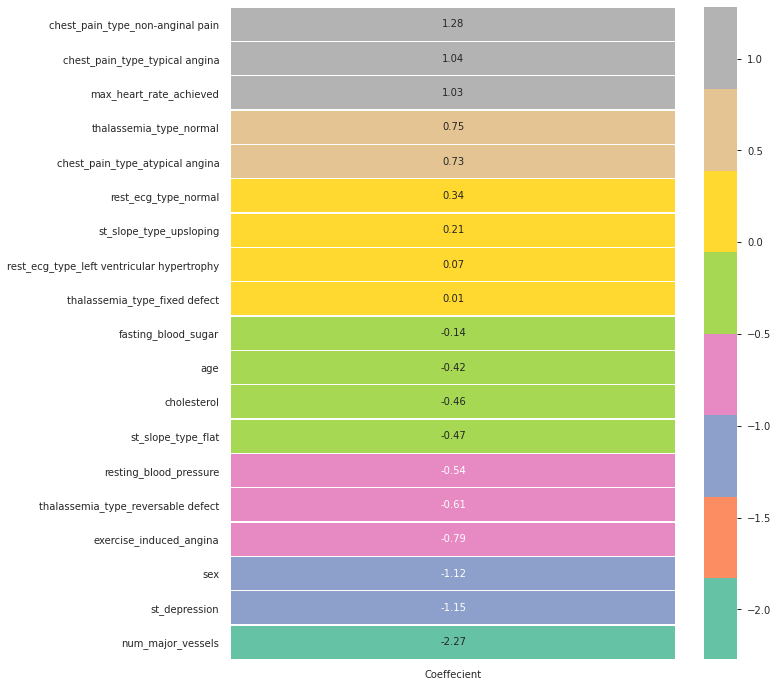

In [864]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)